In [756]:
#made by Mengden Alexey
import numpy as np
import pandas as pd
import scipy.stats
import sys
np.set_printoptions(precision=3, suppress=True)
import matplotlib.pyplot as plt
import scipy as scp

## Problem 1

OLS class where OLS.beta - coefficients, OLS.V - covariance matrix 

In [757]:
X = np.random.randn(100, 3)
y = X.dot(np.array([1,2,3])) + np.random.randn(100)

In [758]:
class OLS:
    """OLS class"""
 
    def __init__(self, y, X):
        """Constructor"""
        self.y = y
        self.X = X

    @property
    def beta(self):
        """
        Coefficient of OLS
        """
        return np.dot(np.linalg.inv(np.dot((self.X).T,self.X)), np.dot((self.X).T, self.y))
 
    @property
    def V(self):
        yxB = self.y - np.dot(self.X, self.beta)
        sigma = (1 / (np.shape(self.X)[0] - np.shape(self.X)[1]))*np.dot(yxB.T, yxB)
        return  sigma**2*np.linalg.inv(np.dot((self.X).T, self.X))
    
    def predict(self, x):
        """
        Prediction 
        """
        yxB = self.y - np.dot(self.X, self.beta)
        sigma = (1 / (np.shape(self.X)[0] - np.shape(self.X)[1]))*np.dot(yxB.T, yxB)
        xx = np.linalg.inv(np.dot(X.T, X))
        vv = sigma**2*(1 + np.dot(np.dot(x.T, xx), x))
        ypredict = np.dot(x.T, self.beta)
        return (sigma**2*(1 + np.dot(np.dot(x.T,xx), x)), np.dot(x.T, self.beta))

In [759]:
z = OLS(y,X)

OLS coefficients:

In [760]:
z.beta

array([ 0.965,  1.925,  2.784])

Covariance matrix:

In [761]:
z.V

array([[ 0.011,  0.   , -0.001],
       [ 0.   ,  0.01 ,  0.001],
       [-0.001,  0.001,  0.01 ]])

In [762]:
z.predict(np.array([1,0,1]))

(1.0104255465498597, 3.7493486644590424)

Internal function:

In [763]:
z,resid,rank,sigma = np.linalg.lstsq(X,y)
z

array([ 0.965,  1.925,  2.784])

## Problem 2

Make series $y_{i}=\underset{k=10}{\overset{10}{\Sigma}} \beta_{k} \frac{x_{i}^k}{k!}+u_{i}$

$\beta$ - uniformly in $(0,1)$:

In [764]:
beta = np.random.uniform(0, 1, 11)

$x$ - uniformly in $(-5,5)$:

In [765]:
x = np.random.uniform(-5, 5, 100)

$u$ ~ $N(0,100)$

In [766]:
u = 10 * np.random.randn(100) + 0

In [767]:
kfact = np.linspace(0, 10, 11)
for i in range(len(kfact)):
    kfact[i] = np.math.factorial(kfact[i])

In [768]:
y = np.poly1d(np.flipud(beta / kfact))(x)
y += u

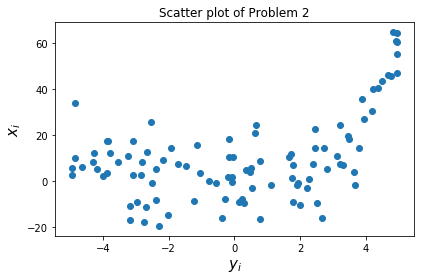

In [769]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel(r'$y_i$', fontsize=15)
ax.set_ylabel(r'$x_i$', fontsize=15)
ax.set_title('Scatter plot of Problem 2')
fig.tight_layout()
plt.show()

## Problem 3


Make random matrix ~ $N(0,1)$

In [770]:
random_matrix = np.random.randn(100, 100)
a ={}
b=[]

def mci(data, confidence=0.90):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scp.stats.sem(a)
    h = se * scp.stats.t._ppf((1+confidence)/2., n-1)
    return  m-h, m+h
def isgoodrandom(random_matrix):
    counting = 0
    for i in range(len(random_matrix)):
        a[i] = mci(random_matrix[i])
        b.append(True) if ((a[i][0]<0) and (a[i][1]>0)) else b.append(False)
        if b[i]:
            counting += 1
    return b, counting

% of columns mean do not reject $H_{0}: \mu = 0$

In [771]:
isgoodrandom(random_matrix)[1]

89

Also for rows:

In [772]:
isgoodrandom(random_matrix.T)[1]

89

That means that random generator is good in randomity. We have equal normal distribution for rows and columns

## Problem 4


In [773]:
import pandas as pd

NHL data for player

In [774]:
df = pd.read_csv('goalies-2014-2016.csv', header = 0, sep = ';')
df.iloc[0:5,0:6]

,n,player,season,team,position,games_played
0,1,Cam Talbot,2016-17,EDM,G,73
1,2,Braden Holtby,2016-17,WSH,G,63
2,3,Sergei Bobrovsky,2016-17,CBJ,G,63
3,4,Devan Dubnyk,2016-17,MIN,G,65
4,5,Tuukka Rask,2016-17,BOS,G,65


In [775]:
df['save_percentage_m'] = round(df['saves'] / df['shots_against'], 3)

difference of calculated and given value for save_percentage:

In [776]:
max(abs(df['save_percentage_m'] - df['save_percentage']))

0.0010000000000001119

Mean values:

In [777]:
df.agg('mean').iloc[[1, 8, 9]]

games_played       28.476703
goals_against      67.605735
save_percentage     0.901179
dtype: float64

Standard errors:

In [778]:
df.agg('std').iloc[[1, 8, 9]]

games_played       22.285395
goals_against      53.351779
save_percentage     0.071260
dtype: float64

Best save_percentage player of 2016-2017:

In [779]:
saveptg = df[(df['season'] == '2016-17') & (df['games_played'] > 40)]['save_percentage']
df[df['player'].index == saveptg.argmax()].iloc[:, [1, 13]]

,player,save_percentage
2,Sergei Bobrovsky,0.931


Best player in term of saves for each season: 

In [780]:
df[df.groupby(['season'])['saves'].transform(max) == df['saves']].iloc[:,[2,1,11]]

,season,player,saves
0,2016-17,Cam Talbot,1946
102,2015-16,Henrik Lundqvist,1788
189,2014-15,Braden Holtby,1887


goalkeepers who have won at least 30 games in all seasons:

In [781]:
idx1 = pd.crosstab(df[df['wins'] > 30]['player'], df['season'][df['wins'] > 30]).sum(axis=1)
aa = pd.crosstab(df[df['wins'] > 30]['player'], df['season']).sum(axis = 1) == 3
for i in range(len(aa)):
    if aa[i] == True and aa[i] in df['player']:
       # print(aa.index[i], df[df['player']==aa.index[i]]['wins'].sum())
        sys.stdout.write('\n'+aa.index[i])



Braden Holtby
Corey Crawford
Devan Dubnyk
Pekka Rinne
Tuukka Rask